In [45]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, silhouette_score
STATE=26

In [27]:
sns.set(style="darkgrid")

In [28]:
Xtrain = pd.read_csv('Xtrain_regression.csv')
Xtest = pd.read_csv('Xtest_regression.csv')

ytrain = pd.read_csv('ytrain_regression.csv')
ytest = pd.read_csv('ytest_regression.csv')

In [29]:

def k_means(data, max_clusters):

    #  *** computes the inertia and silouette score for varying number of clusters and plots them to
    #  show the relationship.
    #   Returns the lists of inertia scores and silhouette scores

    inertia_values = []
    sil_scores = []

    for val in range(1, max_clusters):
        kmeans = KMeans(n_clusters = val, n_init = 30, init = 'k-means++')
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)
        if val >= 2:
            sil_scores.append(silhouette_score(data, kmeans.labels_))

    plt.plot(range(1,max_clusters), inertia_values)
    plt.title('Selecting the optimal value of k using inertia scores')
    plt.xlabel('number of clusters')
    plt.ylabel('total sum of square differences')
    plt.show()

    plt.figure()
    plt.plot(range(2, max_clusters ), sil_scores)
    plt.title('Selecting the optimal value of k using the silhouette scores')
    plt.xlabel('number of clusters')
    plt.ylabel('silhouette scores')
    plt.show()

    return inertia_values, sil_scores

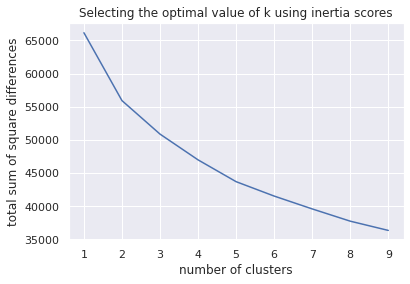

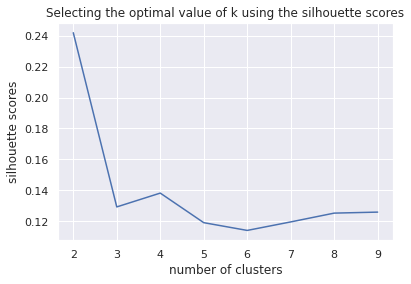

In [30]:
inertia, silhouet = k_means(Xtrain, 10)

In [39]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_score_dict = {}

for knl in kernels:
  start = time.time()

  # fit
  svm_classifier = svm.SVC(kernel=knl, random_state=STATE)
  svm_classifier.fit(Xtrain, ytrain)

  # predict and score
  preds = svm_classifier.predict(Xtest)
  score = accuracy_score(y_true=ytest, y_pred=preds)

  # time
  end = time.time()
  hours, rem = divmod(end - start, 3600)
  mins, sec = divmod(rem, 60)

  # store in dict
  kernel_score_dict[knl] = [score, mins]

kernel_score_dict

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was 

{'linear': [0.85375, 0.0],
 'poly': [0.905, 0.0],
 'rbf': [0.9, 0.0],
 'sigmoid': [0.71625, 0.0]}

In [40]:
svmc = svm.SVC(kernel='rbf', random_state=STATE)
svmc.fit(Xtrain, ytrain)
svmc.score(Xtest, ytest)

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9

In [62]:
clf = LogisticRegression()
hist = clf.fit(Xtrain, ytrain)
clf.score(Xtest, ytest)

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.85625

In [66]:
hist?

In [61]:
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(Xtrain, ytrain)
knn.score(Xtest, ytest)

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.875

In [48]:
np.arange(30,100,10)

array([30, 40, 50, 60, 70, 80, 90])

In [54]:
ks = np.arange(10,200,10)
scores = {}

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(Xtrain, ytrain)
    scs = knn.score(Xtest, ytest)
    scores[k] = scs

/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/d_duodua/anaconda3/envs/denv/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vect

In [55]:
scores

{10: 0.8725,
 20: 0.86875,
 30: 0.86875,
 40: 0.87125,
 50: 0.86625,
 60: 0.86875,
 70: 0.87375,
 80: 0.8725,
 90: 0.87125,
 100: 0.875,
 110: 0.86875,
 120: 0.8675,
 130: 0.86375,
 140: 0.86375,
 150: 0.86125,
 160: 0.85875,
 170: 0.85625,
 180: 0.8525,
 190: 0.85125}

In [60]:
kv = max(scores, key = lambda x: scores[x])
kv

100

In [ ]:
knn = 

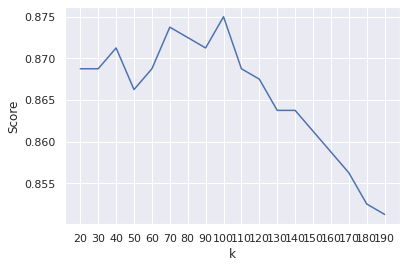

In [52]:
plt.plot(range(20,200,10), scores)
plt.xticks(np.arange(20,200,10))
plt.xlabel("k")
plt.ylabel("Score")
plt.show()

In [ ]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
kernel_score_dict = {}

for knl in kernels:
  start = time.time()

  # fit
  svm_classifier = svm.SVC(kernel=knl, random_state=STATE)
  svm_classifier.fit(Xtrain, ytrain)

  # predict and score
  preds = svm_classifier.predict(Xtest)
  score = accuracy_score(y_true=ytest, y_pred=preds)

  # time
  end = time.time()
  hours, rem = divmod(end - start, 3600)
  mins, sec = divmod(rem, 60)

  # store in dict
  kernel_score_dict[knl] = [score, mins]

kernel_score_dict